In [30]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import dtale
# download the data
df = yf.download('^GSPC', '1931-01-01', '2024-03-28')

df['Day']= df.index

# convert the datetime index to ordinal values, which can be used to plot a regression line
df.index = df.index.map(pd.Timestamp.toordinal)

# Logarithmic transformation (assuming positive 'Close' values)
df['Log_AClose'] = np.log(df['Adj Close'])  

display(df.iloc[:, :])


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Day,Log_AClose
Date,,,,,,,,
704919,15.850000,15.850000,15.850000,15.850000,15.850000,0,1931-01-02,2.763170
704922,15.930000,15.930000,15.930000,15.930000,15.930000,0,1931-01-05,2.768204
704923,16.129999,16.129999,16.129999,16.129999,16.129999,0,1931-01-06,2.780681
704924,15.090000,15.090000,15.090000,15.090000,15.090000,0,1931-01-07,2.714032
704925,16.230000,16.230000,16.230000,16.230000,16.230000,0,1931-01-08,2.786861
...,...,...,...,...,...,...,...,...
738966,5253.430176,5261.100098,5240.660156,5241.529785,5241.529785,4207730000,2024-03-21,8.564369
738967,5242.479980,5246.089844,5229.870117,5234.180176,5234.180176,3374700000,2024-03-22,8.562966
738970,5219.520020,5229.089844,5216.089844,5218.189941,5218.189941,3331360000,2024-03-25,8.559906


S&P

In [31]:
# D-Tale
d = dtale.show(df, host='localhost')   

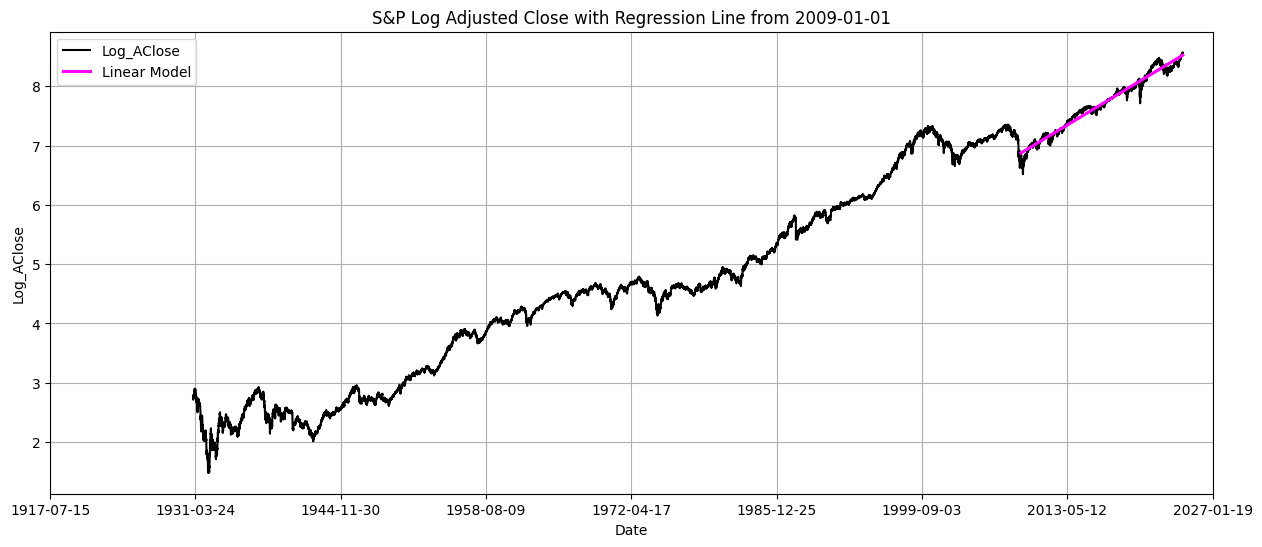

In [34]:


# convert the regression line start date to ordinal
x1 = pd.to_datetime('2009-01-01').toordinal()

# data slice for the regression line
data=df.loc[x1:].reset_index()

# plot the log Adj Close data
ax1 = df.plot(y='Log_AClose', c='k', figsize=(15, 6), grid=True, legend=False,
              title='S&P Log Adjusted Close with Regression Line from 2009-01-01')

# add a regression line
sns.regplot(data=data, x='Date', y='Log_AClose', ax=ax1, color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)

ax1.set_xlim(df.index[0], df.index[-1])

# convert the axis back to datetime
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)

ax1.legend()

plt.show()

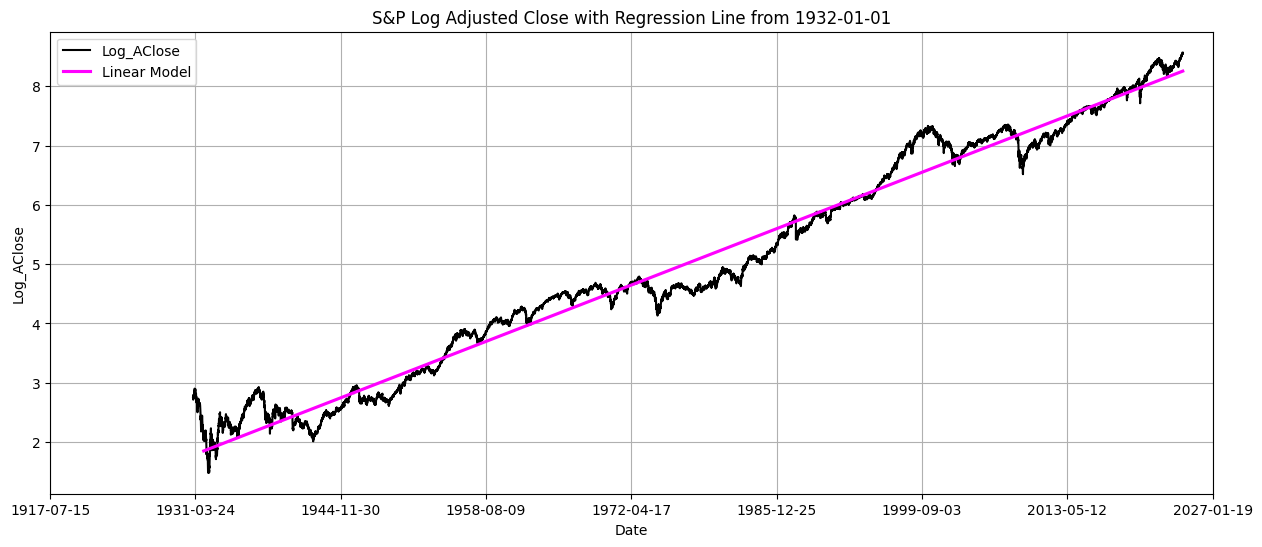

2024-03-28 21:15:42,412 - INFO     - Executing shutdown due to inactivity...
2024-03-28 21:15:42,418 - INFO     - Executing shutdown...
2024-03-28 21:15:42,419 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:

# convert the regression line start date to ordinal
x2 = pd.to_datetime('1932-01-01').toordinal()

# data slice for the regression line
data=df.loc[x2:].reset_index()

# plot the log Adj Close data
ax1 = df.plot(y='Log_AClose', c='k', figsize=(15, 6), grid=True, legend=False,
              title='S&P Log Adjusted Close with Regression Line from 1932-01-01')

# add a regression line
sns.regplot(data=data, x='Date', y='Log_AClose', ax=ax1, color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)

ax1.set_xlim(df.index[0], df.index[-1])

# convert the axis back to datetime
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)

ax1.legend()

plt.show()